### I - DEFINITION DES CHEMINS (INPUTS AND OUTPUTS)

In [1]:
import os
import matplotlib as plt
import cv2
import pandas as pd
import seaborn as sns


current_dir = %pwd
project_dir = os.path.dirname(current_dir)
output_folder = output_folder = os.path.normpath(os.path.join(project_dir, 'data','raw'))
%cd $project_dir

d:\DATA\a.asri\doc-classifier


d:\DATA\a.asri\doc-classifier\.venv\Lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


### II - IMPORT DES FONCTIONS

In [2]:
from chemin_vers_votre_dossier import bluriness
from chemin_vers_votre_dossier import gp_name
from chemin_vers_votre_dossier import extract_image_info

### III - EXTRACTION DES INFORMATIONS - (LIRE COMMENTAIRE CI-DESSOUS)

In [3]:
"""REMARQUE : Cette étape génère un fichier "img_info.csv" contenant des informations détaillées sur les images. L'exécution de cette tâche est estimée à environ 5 minutes.\
Le fichier produit comprendra diverses informations telles que les dimensions, la netteté, l'espace colorimétrique, etc., relatives aux images. Il est important de noter que ce fichier ne sera utilisé qu'une seule fois.
Le DataFrame "image_info" sera créé par la suite à partir de ce fichier et sera complété par les étiquettes issues de l'analyse des images."""

# Définition des chemins de dossiers
folder_paths = []

# Boucle pour créer les chemins de dossiers en fonction de la structure spécifiée
for i in [1, 2, 3, 4]:  
    folder_path = os.path.join(project_dir, 'data', 'raw', f'data_0{i}', 'images')
    folder_paths.append(folder_path)

# Extraire les informations sur les images et créer le fichier 
image_info_df = extract_image_info(folder_paths)



### II - CHARGEMENT DES FICHIERS CONTENANT L'INFORMATION SUR LA CATEGORIES

In [4]:
# Charger les fichiers CSV
data_set02_path = os.path.join(project_dir, 'data','raw', 'data_02', 'other_data.csv')
data_set03_path = os.path.join(project_dir, 'data','raw', 'data_03', 'categories.csv')
data_set04_path = os.path.join(project_dir, 'data','raw',  'data_04', 'categories.csv')

# Charger les fichiers CSV en DataFrame
data_02_df = pd.read_csv(data_set02_path)[['filename', 'type']]
data_03_df = pd.read_csv(data_set03_path)[['image_name', 'category']]
data_04_df = pd.read_csv(data_set04_path)[['image_name', 'category']]

print("Lors du chargement des fichiers CSV, nous avons constaté que les extractions de labels par les méthodes Tesseract ou OCR utilisent des noms de colonnes différents. \n \
Ainsi, avant de procéder à la jointure avec notre DataFrame existant, il a été nécessaire d'uniformiser les noms de colonnes pour assurer la cohérence des données.")

Lors du chargement des fichiers CSV, nous avons constaté que les extractions de labels par les méthodes Tesseract ou OCR utilisent des noms de colonnes différents. 
 Ainsi, avant de procéder à la jointure avec notre DataFrame existant, il a été nécessaire d'uniformiser les noms de colonnes pour assurer la cohérence des données.


### III - JOINTURE DES CATEGORIES (LABELS) AU DATAFRAME "image_info"

In [5]:
# Renommer les colonnes pour dataset 2, 3 et 4 :
data_02_df = data_02_df.rename(columns={'type': 'label' , 'filename' : 'image_name'})
data_03_df = data_03_df.rename(columns={'category': 'label'})
data_04_df = data_04_df.rename(columns={'category': 'label'})

#ajout du champ dataset (pout faire la jointure avec image_info) :
data_02_df['dataset'] = 'data_02'
data_03_df['dataset'] = 'data_03'
data_04_df['dataset'] = 'data_04'

# Créer un DataFrame fusionné des quatre DataFrames
merged_data = pd.concat([data_02_df, data_03_df, data_04_df], ignore_index=True)

# Créer la colonne identifiant unique
merged_data['id'] = merged_data['image_name'] + '_' + merged_data['dataset']

# Créer la colonne identifiant unique
image_info_df['id'] = image_info_df['image_name'] + '_' + image_info_df['dataset']

# Joindre les DataFrames en utilisant l'identifiant unique
image_info_df = pd.merge(image_info_df, merged_data[['id', 'label']], on='id', how='left')

# Mettre à jour la colonne label pour les lignes où dataset est data_01
image_info_df.loc[image_info_df['dataset'] == 'data_01', 'label'] = 'facture'

# Supprimer la colonne identifiant unique
image_info_df.drop(columns=['id'], inplace=True)


# Enregistrement des informations dans un fichier CSV
csv_filepath = os.path.join(output_folder, 'image_info_labeled.csv')

# Enregistrer le DataFrame dans un fichier CSV
image_info_df.to_csv(csv_filepath, index=False)

# Afficher le nom du fichier mis à jour
print(f"Le fichier CSV complété par les catégories d'images a été enregistré sous le chemin:", csv_filepath, '. \n Ce fichier contiendra désormais les catégories associées aux images et sera exploité dans la suite du projet.')

Le fichier CSV complété par les catégories d'images a été enregistré sous le chemin: d:\DATA\a.asri\doc-classifier\data\raw\image_info_labeled.csv . 
 Ce fichier contiendra désormais les catégories associées aux images et sera exploité dans la suite du projet.


### IV - EXPLORATION DU DATAFRAME "image_info"

In [6]:
# Présentation des premières colonnes du dataframe "image_info_df"
image_info_df.head(5)


,image_name,extension,colorspace,height,width,bluriness,path,dataset,label
0,image_0000000.tif,tif,gray,1000,767,1656.190694,a.asri\doc-classifier\data\raw\data_01\images\...,data_01,facture
1,image_0000001.tif,tif,gray,1000,754,3841.701297,a.asri\doc-classifier\data\raw\data_01\images\...,data_01,facture
2,image_0000002.tif,tif,gray,1000,771,2121.018741,a.asri\doc-classifier\data\raw\data_01\images\...,data_01,facture
3,image_0000003.tif,tif,gray,1000,781,4507.434028,a.asri\doc-classifier\data\raw\data_01\images\...,data_01,facture
4,image_0000004.tif,tif,gray,1000,783,3481.415517,a.asri\doc-classifier\data\raw\data_01\images\...,data_01,facture


In [7]:
#Quelques informations sur les données :
image_info_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23717 entries, 0 to 23716
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   image_name  23717 non-null  object 
 1   extension   23717 non-null  object 
 2   colorspace  23717 non-null  object 
 3   height      23717 non-null  int64  
 4   width       23717 non-null  int64  
 5   bluriness   23717 non-null  float64
 6   path        23717 non-null  object 
 7   dataset     23717 non-null  object 
 8   label       23717 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 1.6+ MB


### V - VISUALISATION DU NOMBRE DE DOCUMENT PAR TYPE PAR DATASET

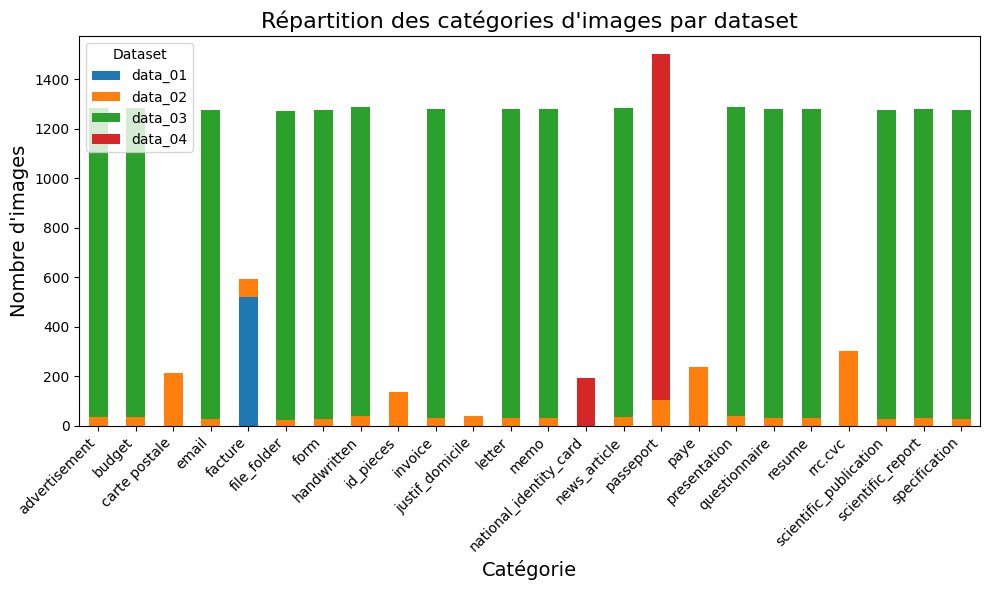

In [8]:
import matplotlib.pyplot as plt

# Grouper les données par catégorie et dataset et compter le nombre d'occurrences
category_counts_by_dataset = image_info_df.groupby(['label', 'dataset']).size().unstack(fill_value=0)

# Créer un graphique à barres empilées
category_counts_by_dataset.plot(kind='bar', stacked=True, figsize=(10, 6))

# Ajouter des titres et des légendes
plt.title('Répartition des catégories d\'images par dataset', fontsize=16)
plt.xlabel('Catégorie', fontsize=14)
plt.ylabel('Nombre d\'images', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotation des étiquettes sur l'axe x pour une meilleure lisibilité
plt.legend(title='Dataset')

# Afficher le graphique
plt.tight_layout()
plt.show()

### VI - QUELQUES STATISTIQUES SUPPLEMENTAIRES

In [9]:
# Calcul des décomptes des catégories par dataset
category_counts_by_dataset = image_info_df.groupby(['dataset', 'label']).size().unstack(fill_value=0)

# Affichage du tableau
print("Nombre d'images par catégorie et par dataset :\n")
print(category_counts_by_dataset)

Nombre d'images par catégorie et par dataset :

label    advertisement  budget  carte postale  email  facture  file_folder  \
dataset                                                                      
data_01              0       0              0      0      520            0   
data_02             33      33            214     28       73           24   
data_03           1250    1250              0   1250        0         1250   
data_04              0       0              0      0        0            0   

label    form  handwritten  id_pieces  invoice  ...  news_article  passeport  \
dataset                                         ...                            
data_01     0            0          0        0  ...             0          0   
data_02    27           40        138       32  ...            36        104   
data_03  1250         1250          0     1250  ...          1250          0   
data_04     0            0          0        0  ...             0       1397   

la

In [34]:
print("Statistiques sur les données :\n")
print(image_info_df.describe())

Statistiques sur les données :

             height         width     bluriness
count  23717.000000  23717.000000  23717.000000
mean     962.174263    767.159211   5825.798276
std      229.980094    166.834703   4743.706901
min      133.000000    150.000000     10.572090
25%     1000.000000    754.000000   2530.216178
50%     1000.000000    754.000000   4801.298672
75%     1000.000000    777.000000   7801.196134
max     4455.000000   4700.000000  81949.534005
